In [ ]:
!pip install pypmi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
# import pypmi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import decomposition
from sklearn import mixture
import itertools
from sklearn import metrics
%matplotlib inline
sns.set()
import random
random.seed(123)

In [ ]:
!unzip "/content/drive/MyDrive/_Archived_PPMI_Data.zip"

Archive:  /content/drive/MyDrive/_Archived_PPMI_Data.zip
 extracting: Screening___Demographics-Archived.csv  
 extracting: Family_History__PD_-Archived.csv  
 extracting: MDS_UPDRS_Part_I-Archived.csv  
 extracting: MDS_UPDRS_Part_I__Patient_Questionnaire-Archived.csv  
 extracting: MDS_UPDRS_Part_II__Patient_Questionnaire-Archived.csv  
 extracting: MDS_UPDRS_Part_III-Archived.csv  
 extracting: MDS_UPDRS_Part_IV-Archived.csv  
 extracting: Modified_Schwab_+_England_ADL-Archived.csv  
 extracting: Hopkins_Verbal_Learning_Test-Archived.csv  
 extracting: Benton_Judgment_of_Line_Orientation-Archived.csv  
 extracting: Semantic_Fluency-Archived.csv  
 extracting: Letter_-_Number_Sequencing__PD_-Archived.csv  
 extracting: Symbol_Digit_Modalities-Archived.csv  
 extracting: Montreal_Cognitive_Assessment__MoCA_-Archived.csv  
 extracting: Geriatric_Depression_Scale__Short_-Archived.csv  
 extracting: State-Trait_Anxiety_Inventory-Archived.csv  
 extracting: QUIP_Current_Short-Archived.csv 

In [ ]:
covariates = {}

########## SUBJECT CHARACHTERISTIC AND MEDICAL HISTORY ##########

#Patients enrolment status
covariates["pat_status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
#Demographic infomation of patients 
covariates["pat_demographics"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
#Family History Table Covariates
covariates["pat_family_history"] = ["PATNO", "BIOMOMPD", "BIODADPD", "FULSIBPD", "HAFSIBPD", "MAGPARPD", "PAGPARPD", "MATAUPD", "PATAUPD", "KIDSPD"]

########## MOTOR AND NON-MOTOR ASSESSMENTS ##########

#UPDRS - Unified Parkinson’s Disease Rating Scale (Part 1 - Part 4)
covariates["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
covariates["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
covariates["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
covariates["updrs3"] = ["PATNO", "EVENT_ID", "PAG_NAME", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
# MOCA - Montreal Cognitive Assessment
covariates["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
# STAI - State-Trait Anxiety Inventory Test
covariates["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
# GDS - Geriatric Depression Scale
covariates["gds"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
# QUIP- Questionnaire for Impulsive-compulsive Disorder in Parkinson’s Disease 
covariates["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
# SCOPA-AUT - Scale for Outcomes in Parkinson’s Disease – Autonomic Dysfunction Test 
covariates["scopa_aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
# SFT - Semantic Fluency Test
covariates["sft"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
# REM-RBD - Rapid Eye Movement Sleep Behavior Disorder Test
covariates["rem_rbd"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
#EPWORTH - Epworth Sleepness Scale
covariates["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
# HVLT- Hopkins Verbal Learning Test
covariates["hvlt"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
# LNS - Letter Number Sequencing Test
covariates["lns"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
# Neurological exam: Cranial Nerves Test
covariates["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# SDM - Symbol Digit Modalities Test
covariates["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
# Neuropsychological Test - (Line Orientation)
covariates["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]

In [ ]:
path='/content/'

########## SUBJECT CHARACHTERISTIC AND MEDICAL HISTORY ##########
pat_status = pd.read_csv(path+"Patient_Status-Archived.csv", index_col=["PATNO"], usecols=covariates["pat_status"])
pat_demographics = pd.read_csv(path+"Screening___Demographics-Archived.csv", index_col=["PATNO"], usecols=covariates["pat_demographics"])
pat_family_history = pd.read_csv(path+"Family_History__PD_-Archived.csv", index_col=["PATNO"], usecols=covariates["pat_family_history"])

########## MOTOR AND NON-MOTOR ASSESSMENTS ##########
updrs1 = pd.read_csv(path+"MDS_UPDRS_Part_I-Archived.csv", index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"], usecols=covariates["updrs1"])
updrs1pq = pd.read_csv(path+"MDS_UPDRS_Part_I__Patient_Questionnaire-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["updrs1pq"])
updrs2pq = pd.read_csv(path+"MDS_UPDRS_Part_II__Patient_Questionnaire-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["updrs2pq"])
updrs3_temp = pd.read_csv(path+"MDS_UPDRS_Part_III-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["updrs3"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # pre med dose 
# updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # post med dose  
moca = pd.read_csv(path+"Montreal_Cognitive_Assessment__MoCA_-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["moca"])
stai = pd.read_csv(path+"State-Trait_Anxiety_Inventory-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["stai"])
gds = pd.read_csv(path+"Geriatric_Depression_Scale__Short_-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["gds"])
quip = pd.read_csv(path+"QUIP_Current_Short-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["quip"])
scopa_aut = pd.read_csv(path+"SCOPA-AUT-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["scopa_aut"])
sft = pd.read_csv(path+"Semantic_Fluency-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["sft"])
rem_rbd = pd.read_csv(path+"REM_Sleep_Disorder_Questionnaire-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["rem_rbd"])
epworth = pd.read_csv(path+"Epworth_Sleepiness_Scale-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["epworth"])
hvlt = pd.read_csv(path+"Hopkins_Verbal_Learning_Test-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["hvlt"])
lns = pd.read_csv(path+"Letter_-_Number_Sequencing__PD_-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["lns"])
neuro_cranial = pd.read_csv(path+"Neurological_Exam_-_Cranial_Nerves-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["neuro_cranial"])
sdm = pd.read_csv(path+"Symbol_Digit_Modalities-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["sdm"])
benton = pd.read_csv(path+"Benton_Judgment_of_Line_Orientation-Archived.csv", index_col=["PATNO", "EVENT_ID"], usecols=covariates["benton"])

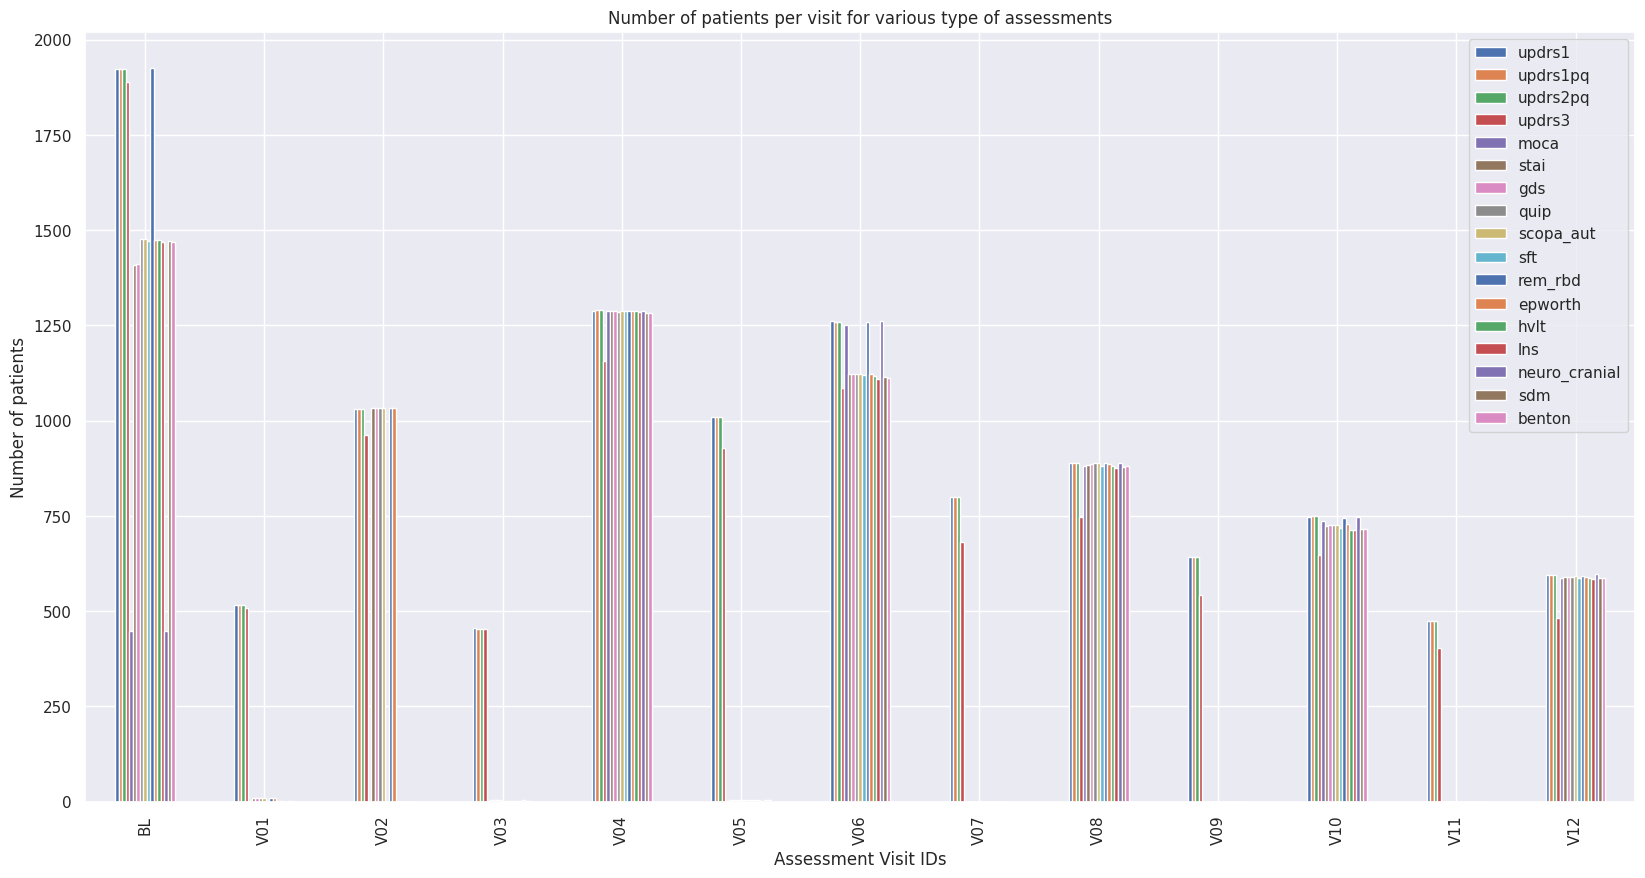

In [ ]:
list_of_datasets = ['updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'moca', 'stai', 'gds', 'quip', 'scopa_aut', 
            'sft', 'rem_rbd', 'epworth', 'hvlt', 'lns', 'neuro_cranial', 'sdm', 'benton']

visit_ids = ['BL', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12']
last_visit = visit_ids[-1] #V12


init_dataset = eval(list_of_datasets[0]).reset_index()
plot = init_dataset.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:list_of_datasets[0]})

for dataset in list_of_datasets[1:]:    
    dataset_idx = eval(dataset).reset_index()
    temp_plot = dataset_idx.reset_index().groupby('EVENT_ID').size().reset_index().rename(columns={0:dataset})
    
    plot = plot.merge(temp_plot, on='EVENT_ID', how='outer')
    
plot = plot.set_index('EVENT_ID').loc[visit_ids].plot(kind='bar', title="Number of patients per visit for various type of assessments",
                                                      figsize=(20, 10))
plot.set_ylabel("Number of patients");
plot.set_xlabel("Assessment Visit IDs");

In [ ]:
#Selecting visits of interest
visit_ids_of_interest = ['BL', 'V02', 'V04', 'V06', 'V08', 'V10', 'V12']
last_visit = visit_ids_of_interest[-1] #V12

# selecting patient data who participated from BL to last_visit
dataset_temp = eval(list_of_datasets[0]).reset_index()
list_of_ptnno = dataset_temp[ dataset_temp.EVENT_ID == last_visit ]['PATNO']

for dataset in list_of_datasets:
    dataset_temp = eval(dataset).reset_index()
    patno_temp = dataset_temp[ dataset_temp.EVENT_ID == last_visit ]['PATNO']
    list_of_ptnno = list_of_ptnno[ list_of_ptnno.isin(patno_temp)]

print(f'Total {list_of_ptnno.size} number of patients who participated till last visit for all assessments')

Total 476 number of patients who participated till last visit for all assessments


In [ ]:
#Selecting visits of interest
visit_ids_of_interest = ['BL', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12']
last_visit = visit_ids_of_interest[-1] #V12

# selecting patient data who participated from BL to last_visit
dataset_temp = eval(list_of_datasets[0]).reset_index()
list_of_ptnno = dataset_temp[ dataset_temp.EVENT_ID == last_visit ]['PATNO']

for dataset in list_of_datasets:
    dataset_temp = eval(dataset).reset_index()
    patno_temp = dataset_temp[ dataset_temp.EVENT_ID == last_visit ]['PATNO']
    list_of_ptnno = list_of_ptnno[ list_of_ptnno.isin(patno_temp)]

print(f'Total {list_of_ptnno.size} number of patients who participated till last visit for all assessments')

Total 476 number of patients who participated till last visit for all assessments


In [ ]:
merged_data = {}
status = pat_status[pat_status.index.isin(list_of_ptnno)].ENROLL_CAT
demographics = pat_demographics[pat_demographics.index.isin(list_of_ptnno)]
merged_data["info"] = pd.concat([status, demographics], axis=1)

for dataset in list_of_datasets:    
    dataset_temp = eval(dataset).reset_index()
    merged_data[dataset] = dataset_temp[ dataset_temp['PATNO'].isin(list_of_ptnno) & dataset_temp['EVENT_ID'].isin(visit_ids_of_interest) ]

merged_data["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size()

ENROLL_CAT
GENPD         8
GENUN         6
HC          154
PD          294
PRODROMA     10
REGPD         1
SWEDD         3
dtype: int64

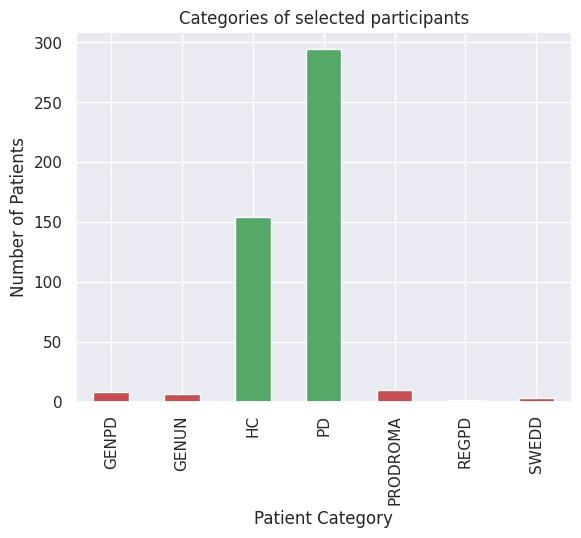

In [ ]:
plot_1 = merged_data["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar',
                                                                                        title="Categories of selected participants", 
                                                                                        color = ['r','r','g','g','r','r','r'])
plot_1.set_ylabel("Number of Patients"); 
plot_1.set_xlabel("Patient Category");

<Axes: title={'center': 'Gender of selected Participants'}, xlabel='GENDER'>

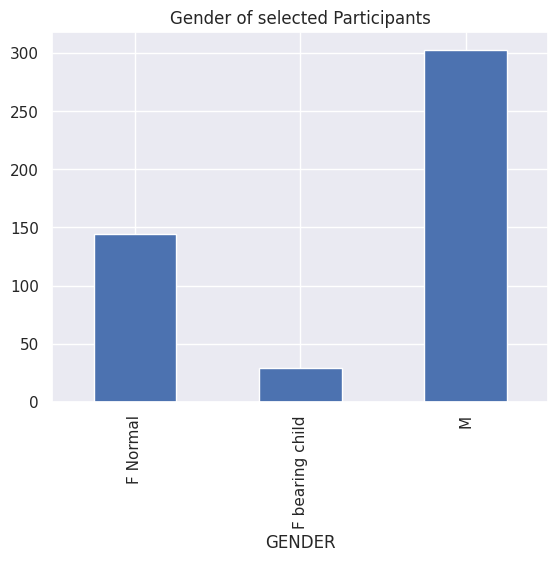

In [ ]:
merged_data["info"].GENDER.replace([0, 1, 2], ['F bearing child', 'F Normal', 'M']).reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected Participants")

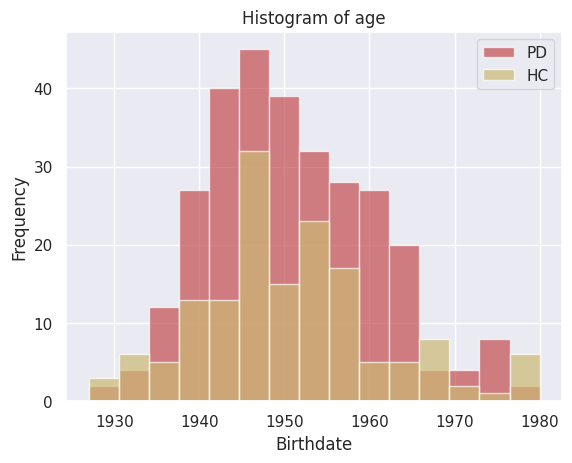

In [ ]:
hc_birthdt = merged_data["info"].BIRTHDT.reset_index()[merged_data["info"].reset_index()['ENROLL_CAT'] == 'HC'].rename(columns={'BIRTHDT':'HC'})
pd_birthdt = merged_data["info"].BIRTHDT.reset_index()[merged_data["info"].reset_index()['ENROLL_CAT'] == 'PD'].rename(columns={'BIRTHDT':'PD'})
concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca(), color = ['r','y'])
plot_3.set_xlabel("Birthdate");

In [ ]:
d1 = merged_data['updrs1'].drop('INFODT',axis=1) #drop unwated column
d1 = d1.set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO') #set index and sort data 
d1 = d1.unstack().reset_index().set_index('PATNO') #pivot sorted data and reset index
d1 = d1.interpolate(method='linear', axis=1) #handeling missing values using linear function

d2 = merged_data['updrs1pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d2 = d2.unstack().reset_index().set_index('PATNO')
d2 = d2.interpolate(method='linear', axis=1)

d3 = merged_data['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d3 = d3.unstack().reset_index().set_index('PATNO')
d3 = d3.interpolate(method='linear', axis=1)

d4 = merged_data['updrs3'].drop(['PAG_NAME','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1)
d4 = d4.set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d4 = d4.unstack().reset_index().set_index('PATNO')
d4 = d4.interpolate(method='linear', axis=1)

d5 = merged_data['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d5 = d5.unstack().reset_index().set_index('PATNO')
d5 = d5.interpolate(method='linear', axis=1)

d6 = merged_data['stai'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d6 = d6.unstack().reset_index().set_index('PATNO')
d6 = d6.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d7 = merged_data['gds'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d7 = d7.unstack().reset_index().set_index('PATNO')
d7 = d7.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d8 = merged_data['quip'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d8 = d8.unstack().reset_index().set_index('PATNO')
d8 = d8.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d9 = merged_data['scopa_aut'].drop(['SCAU23AT','SCAU26AT','SCAU26BT','SCAU26CT','SCAU26DT'],axis=1)
d9 = d9.set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d9 = d9.unstack().reset_index().set_index('PATNO')
d9 = d9.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d10 = merged_data['sft'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d10 = d10.unstack().reset_index().set_index('PATNO')
d10 = d10.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d11 = merged_data['rem_rbd'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d11 = d11.unstack().reset_index().set_index('PATNO')
d11 = d11.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d12 = merged_data['epworth'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d12 = d12.unstack().reset_index().set_index('PATNO')
d12 = d12.interpolate(method='linear', axis=1)

d13 = merged_data['hvlt'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d13 = d13.unstack().reset_index().set_index('PATNO')
d13 = d13.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d14 = merged_data['lns'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d14 = d14.unstack().reset_index().set_index('PATNO')
d14 = d14.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d15 = merged_data['neuro_cranial'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d15 = d15.unstack().reset_index().set_index('PATNO')
d15 = d15.interpolate(method='linear', axis=1)

d16 = merged_data['sdm'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d16 = d16.unstack().reset_index().set_index('PATNO')
d16 = d16.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

d17 = merged_data['benton'].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO')
d17 = d17.unstack().reset_index().set_index('PATNO')
d17 = d17.interpolate(method='linear', axis=1)

arr_of_vect_datasets = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17]

In [ ]:
minmax = {}
i=1
for d in arr_of_vect_datasets:
    dataset = 'd' + str(i)
    i = i+1
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    for col in dataset_columns:
        minmax[dataset][col] = (eval(dataset)[col]-eval(dataset)[col].min().min())/(eval(dataset)[col].max().max()-eval(dataset)[col].min().min() )

db_minmax = pd.concat([minmax['d1'], minmax['d2'], minmax['d3'], minmax['d4'], minmax['d5'], minmax['d6'] , minmax['d7'], 
                  minmax['d8'], minmax['d9'], minmax['d10'], minmax['d11'], minmax['d12'], minmax['d13'], minmax['d14'],
                  minmax['d15'], minmax['d16'],minmax['d17']], axis=1)
db_minmax = db_minmax.interpolate(method='linear', axis=1, limit=10, limit_direction='both')

db_minmax.head(3)

NP1COG                                                               \
EVENT_ID     BL     V01    V02     V03   V04    V05   V06   V07   V08    V09   
PATNO                                                                          
3000       0.25  0.1875  0.125  0.0625  0.00  0.125  0.25  0.25  0.25  0.125   
3001       0.00  0.0000  0.000  0.0000  0.25  0.000  0.00  0.00  0.00  0.000   
3002       0.25  0.2500  0.250  0.2500  0.25  0.250  0.50  0.25  0.25  0.500   

          ...  SDMTOTAL           JLO_TOTRAW                           \
EVENT_ID  ...       V10       V12         BL       V01       V03  V04   
PATNO     ...                                                           
3000      ...  0.500000  0.519608   1.000000  1.000000  1.000000  1.0   
3001      ...  0.470588  0.441176   1.000000  0.933333  0.866667  0.8   
3002      ...  0.421569  0.372549   0.866667  0.844444  0.822222  0.8   

                                                  
EVENT_ID       V06       V08       V10       V12  
PATNO                                             
3000      0.933333  0.866667  0.933333  1.000000  
3001      1.000000  0.866667  0.933333  1.000000  
3002      0.866667  0.733333  1.000000  0.866667  

[3 rows x 2181 columns]

In [ ]:
db_selected = db_minmax #db_zs
db_selected_labled = pd.concat([db_selected, merged_data["info"].ENROLL_CAT], axis=1) # labeling of selected subjects
db_selected_labled.head(3)

,"(NP1COG, BL)","(NP1COG, V01)","(NP1COG, V02)","(NP1COG, V03)","(NP1COG, V04)","(NP1COG, V05)","(NP1COG, V06)","(NP1COG, V07)","(NP1COG, V08)","(NP1COG, V09)",...,"(SDMTOTAL, V12)","(JLO_TOTRAW, BL)","(JLO_TOTRAW, V01)","(JLO_TOTRAW, V03)","(JLO_TOTRAW, V04)","(JLO_TOTRAW, V06)","(JLO_TOTRAW, V08)","(JLO_TOTRAW, V10)","(JLO_TOTRAW, V12)",ENROLL_CAT
PATNO,,,,,,,,,,,,,,,,,,,,,
3000,0.25,0.1875,0.125,0.0625,0.00,0.125,0.25,0.25,0.25,0.125,...,0.519608,1.000000,1.000000,1.000000,1.0,0.933333,0.866667,0.933333,1.000000,HC
3001,0.00,0.0000,0.000,0.0000,0.25,0.000,0.00,0.00,0.00,0.000,...,0.441176,1.000000,0.933333,0.866667,0.8,1.000000,0.866667,0.933333,1.000000,PD
3002,0.25,0.2500,0.250,0.2500,0.25,0.250,0.50,0.25,0.25,0.500,...,0.372549,0.866667,0.844444,0.822222,0.8,0.866667,0.733333,1.000000,0.866667,PD


In [ ]:
db_selected_labled.to_csv(r'/content/merged_data_some_visit.csv')